In [ ]:
Урок 20-1
Анализ временных рядов

In [ ]:
Временной ряд
Это последовательность точек данных,
собранных или записанных в
последовательные моменты времени, как
правило, через равномерные интервалы.
Характеризуется временной
упорядоченностью, что означает, что
порядок наблюдения точек данных имеет
решающее значение для анализа. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset


In [4]:
data = get_rdataset('AirPassengers', 'datasets').data
data

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


In [5]:
data.index = pd.date_range(start = "1949-01", periods = len(data.index), freq =
"ME").to_period()
data.index = data.index.to_timestamp()
data.head()

,time,value
1949-01-01,1949.000000,112
1949-02-01,1949.083333,118
1949-03-01,1949.166667,132
1949-04-01,1949.250000,129
1949-05-01,1949.333333,121


In [ ]:
Разложение временного ряда

In [6]:
# Декомпозиция временного ряда
decomposition = seasonal_decompose(data['value'], model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

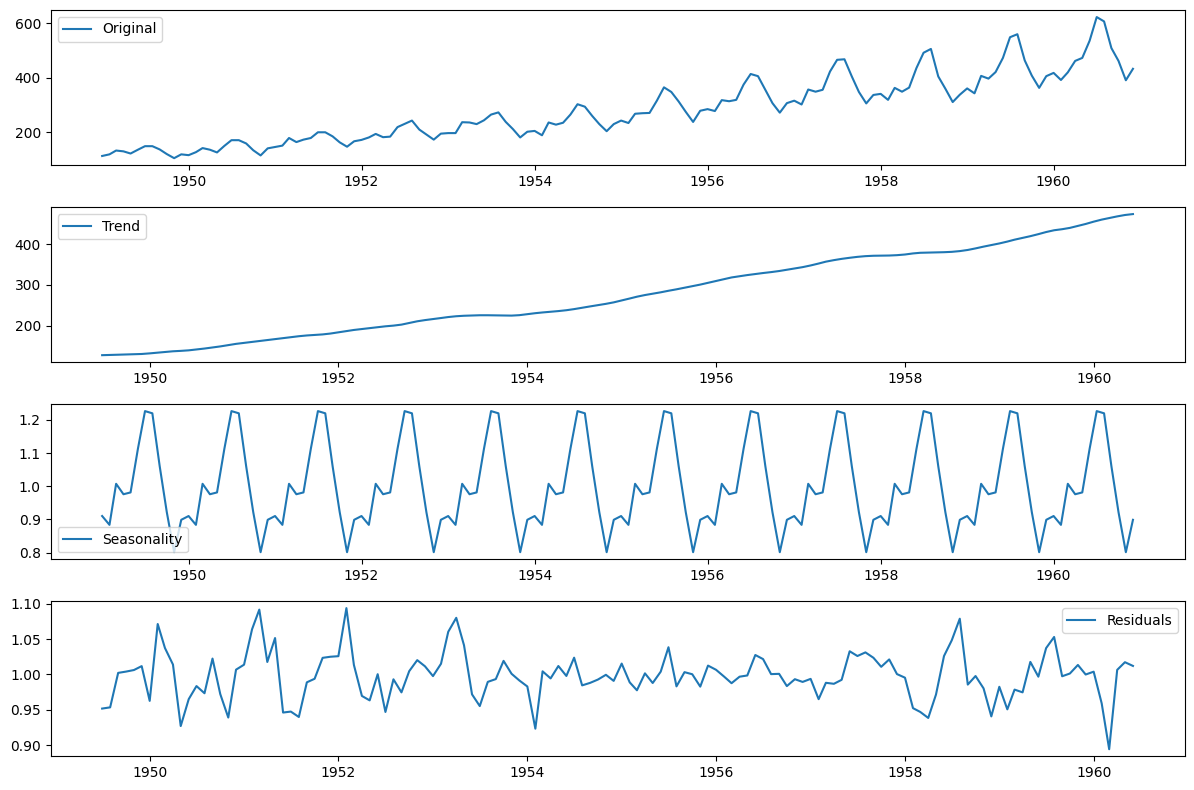

In [7]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['value'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [8]:
decomposition = seasonal_decompose(data['value'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

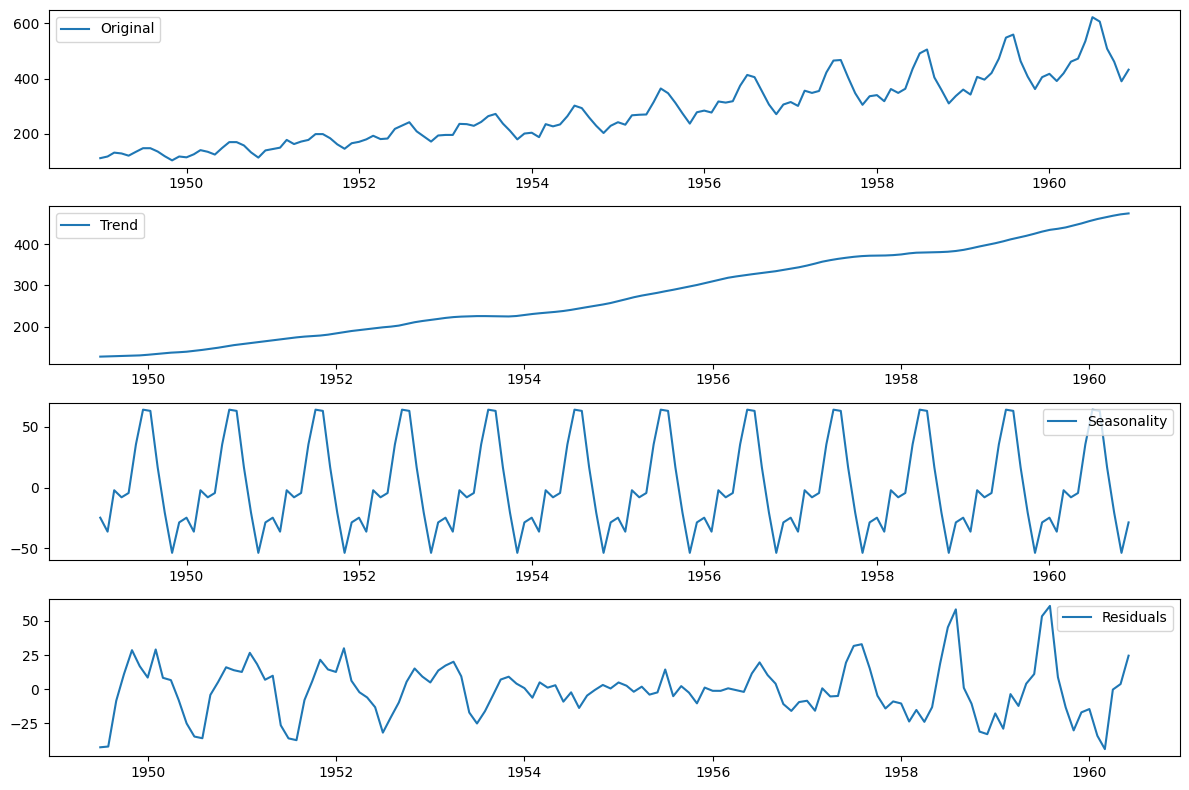

In [9]:
plt.figure(figsize=(12, 8)) #аддитивная модель
plt.subplot(411)
plt.plot(data['value'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
Выполнение ADF-теста

In [11]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['value'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Критические значения:', result[4])
if result[1] < 0.05:
 print("Временной ряд стационарен")
else:
 print("Временной ряд нестационарный")

ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641
Критические значения: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}
Временной ряд нестационарный


In [ ]:
Автокорреляция
Измеряет линейную связь между
наблюдениями во временном ряду и
наблюдениями на предыдущих временных
шагах (лагах). Помогает выявить
закономерности и зависимости в данных,
указывая на то, как прошлые значения
влияют на текущие.

In [ ]:
Автокорреляционная
функция (АКФ)
Оценивает корреляцию между
наблюдениями для набора лагов.

In [ ]:
График автокорреляционной функции

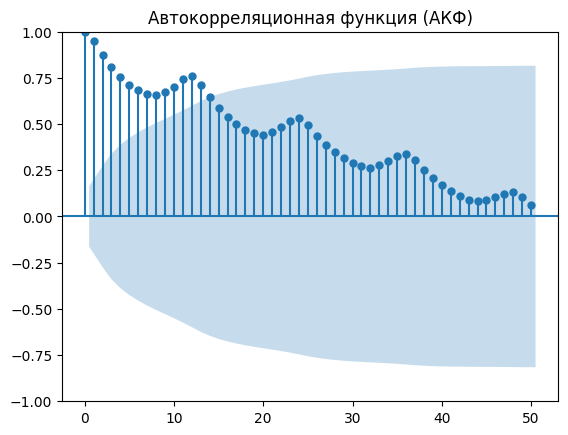

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['value'], lags=50)
plt.title('Автокорреляционная функция (АКФ)')
plt.show()

In [ ]:
График частичной автокорреляционной
функции

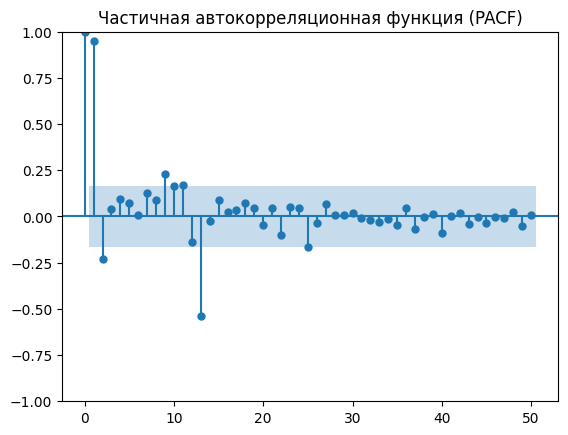

In [13]:
plot_pacf(data['value'], lags=50)
plt.title('Частичная автокорреляционная функция (PACF)')
plt.show()

In [ ]:
Ȃовторная выборка
Это важнейшая техника анализа временных
рядов, которая заключается в изменении
частоты данных временного ряда. Это
может быть сделано либо путем
апсемплинга, либо путем даунсемплинга.
Позволяет обобщать или агрегировать
данные по различным временным
периодам.

In [ ]:
Апсемплинг
Это увеличение частоты данных временного
ряда, например, преобразование
ежедневных данных в часовые. При этом
часто приходится заполнять недостающие
значения с помощью таких методов, как
интерполяция.

In [ ]:
Даунсемплинг
Это уменьшение частоты данных
временного ряда, например,
преобразование часовых данных в
ежедневные. Обычно это связано с
агрегированием точек данных с помощью
таких функций, как sum, mean или max.

In [ ]:
Импорт библиотек и загрузка данных

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel(r'Superstore.xlsx', sheet_name='Orders')
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.set_index('Order Date', inplace=True)

In [ ]:
Агрегация продаж по месяцам

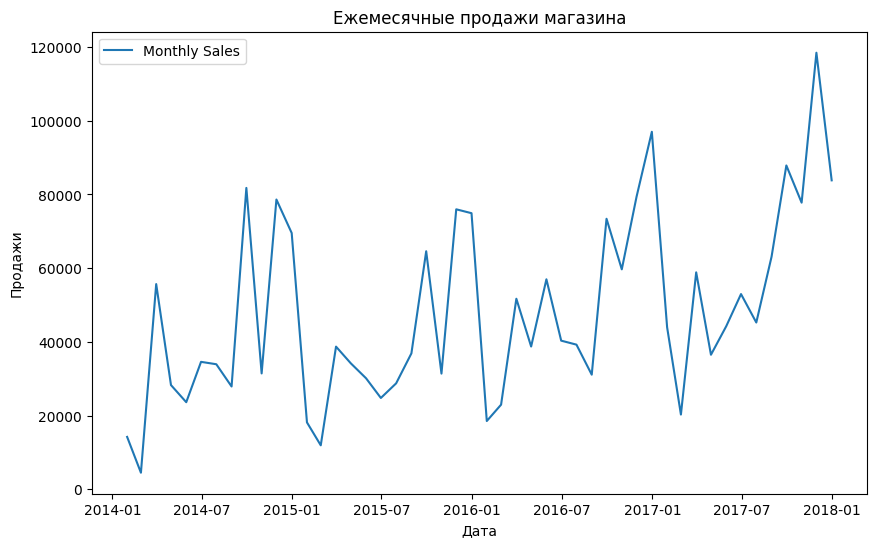

Order Date
2014-01-31     14236.8950
2014-02-28      4519.8920
2014-03-31     55691.0090
2014-04-30     28295.3450
2014-05-31     23648.2870
2014-06-30     34595.1276
2014-07-31     33946.3930
2014-08-31     27909.4685
2014-09-30     81777.3508
2014-10-31     31453.3930
2014-11-30     78628.7167
2014-12-31     69545.6205
2015-01-31     18174.0756
2015-02-28     11951.4110
2015-03-31     38726.2520
2015-04-30     34195.2085
2015-05-31     30131.6865
2015-06-30     24797.2920
2015-07-31     28765.3250
2015-08-31     36898.3322
2015-09-30     64595.9180
2015-10-31     31404.9235
2015-11-30     75972.5635
2015-12-31     74919.5212
2016-01-31     18542.4910
2016-02-29     22978.8150
2016-03-31     51715.8750
2016-04-30     38750.0390
2016-05-31     56987.7280
2016-06-30     40344.5340
2016-07-31     39261.9630
2016-08-31     31115.3743
2016-09-30     73410.0249
2016-10-31     59687.7450
2016-11-30     79411.9658
2016-12-31     96999.0430
2017-01-31     43971.3740
2017-02-28     20301.1334
2

In [17]:
# Агрегируем продажи по месяцам
monthly_sales = data['Sales'].resample('ME').sum()
# Постройте график продаж за месяц
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, label='Monthly Sales')
plt.title('Ежемесячные продажи магазина')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.show()
monthly_sales

In [ ]:
Агрегация продаж по неделям

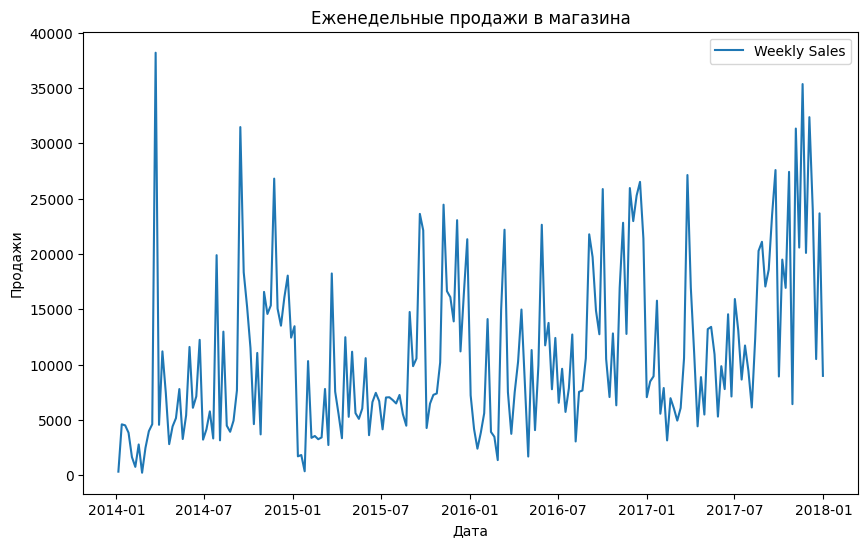

In [18]:
# Агрегирование продаж по неделям
weekly_sales = data['Sales'].resample('W').sum()
# Постройте график недельных продаж
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales, label='Weekly Sales')
plt.title('Еженедельные продажи в магазина')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.show()

In [ ]:
Агрегация продаж по дням

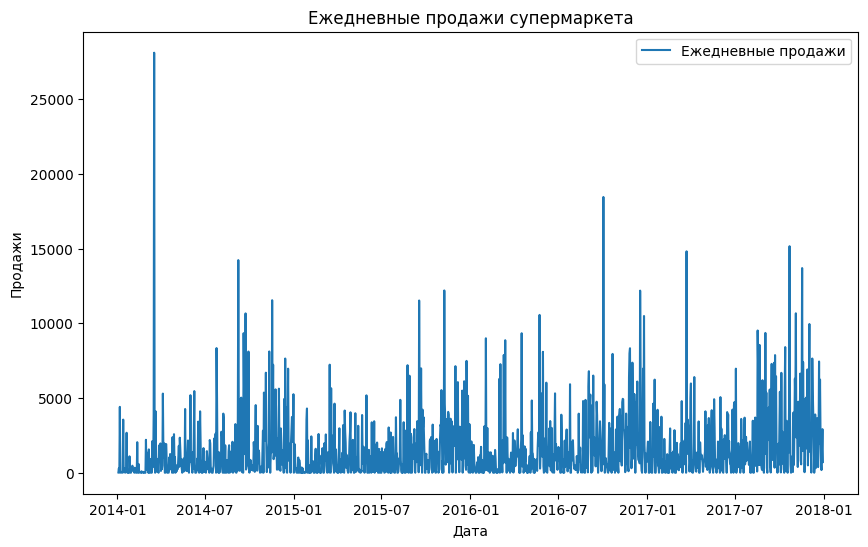

In [19]:
# Агрегирование продаж по дням
daily_sales = data['Sales'].resample('D').sum()
# Постройте график ежедневных продаж
plt.figure(figsize=(10, 6))
plt.plot(daily_sales, label='Ежедневные продажи')
plt.title('Ежедневные продажи супермаркета')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.show()

In [ ]:
Ȁастройка агрегирования

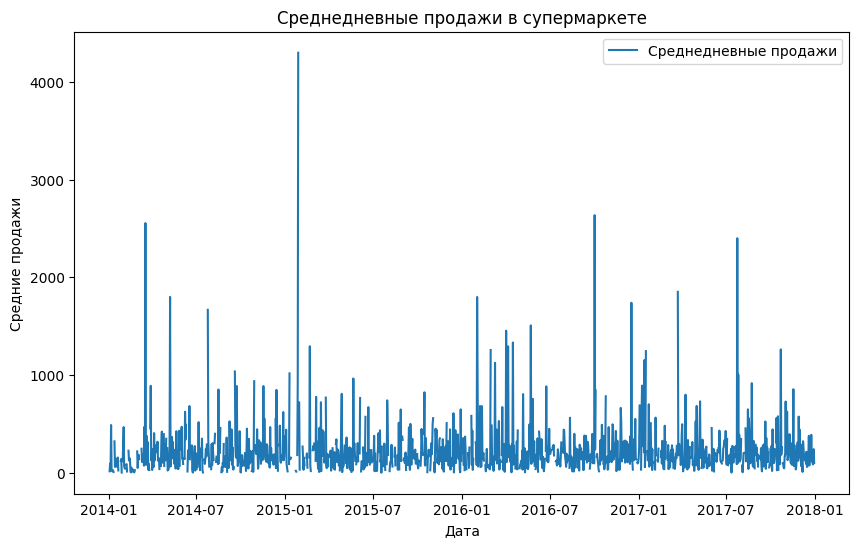

In [20]:
# Агрегируем продажи по дням и вычисляем среднее значение
daily_sales_mean = data['Sales'].resample('D').mean()
# Постройте график среднедневных продаж
plt.figure(figsize=(10, 6))
plt.plot(daily_sales_mean, label='Среднедневные продажи')
plt.title('Среднедневные продажи в супермаркете')
plt.xlabel('Дата')
plt.ylabel('Средние продажи')
plt.legend()
plt.show()

In [ ]:
Разложите временной ряд, агрегированный по месяцам, на составляющие: тренд, сезонность и шум.

In [22]:
# Декомпозиция временного ряда
decomposition = seasonal_decompose(monthly_sales, model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

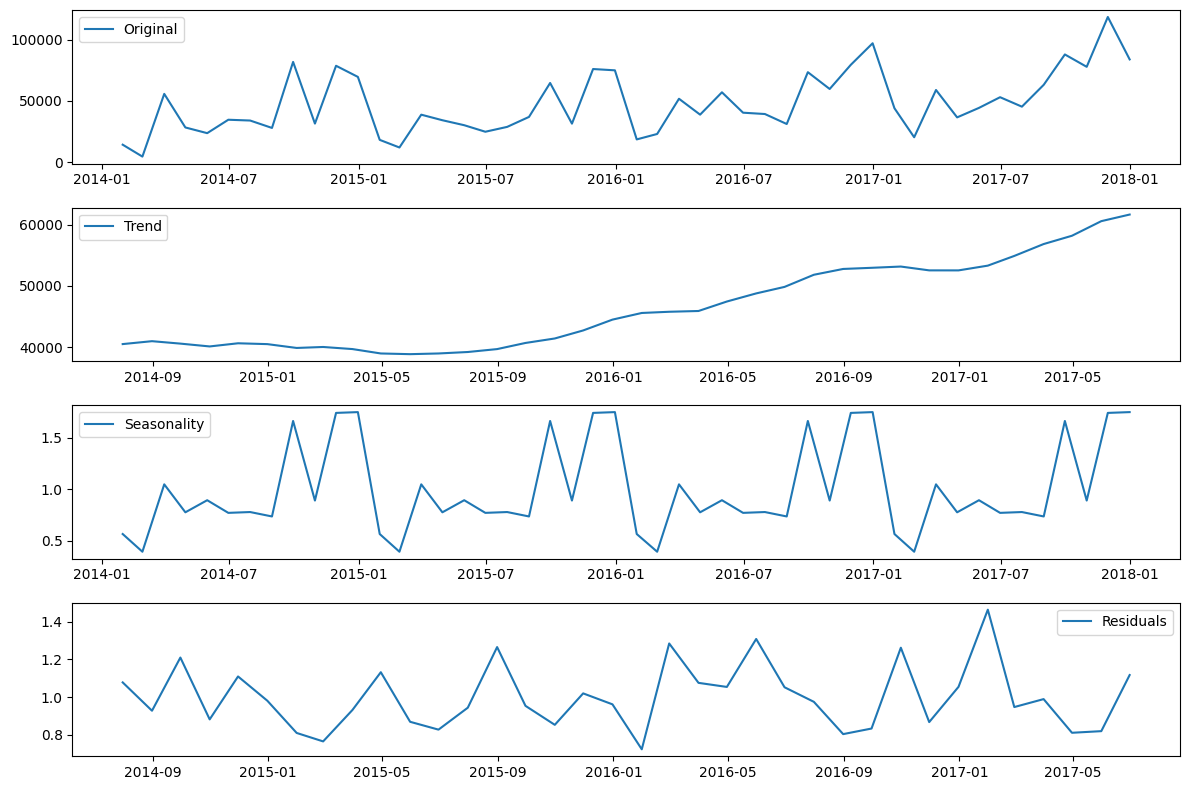

In [24]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(monthly_sales, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
Проверьте стационарность временного ряда, агрегированного по месяцам.

In [27]:
result = adfuller(monthly_sales)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Критические значения:', result[4])
if result[1] < 0.05:
 print("Временной ряд стационарен")
else:
 print("Временной ряд нестационарный")
print('лаг:', result[2])

ADF Statistic: -4.493767844002665
p-value: 0.00020180198458237758
Критические значения: {'1%': np.float64(-3.5778480370438146), '5%': np.float64(-2.925338105429433), '10%': np.float64(-2.6007735310095064)}
Временной ряд стационарен
лаг: 0


In [ ]:
Если лаг = 0, значит невозможно предсказать будущие значения на основании прошлых значений. Данные разбросаны.

In [ ]:
Прогнозирование - это инструмент, используемый в различных
областях для принятия обоснованных
решений, планирования будущего и
управления рисками.

In [ ]:
Модель ARIMA
Или AutoRegressive Integrated Moving
Average - это мощный и универсальный
инструмент для прогнозирования
временных рядов. 

In [28]:
from statsmodels.tsa.arima.model import ARIMA
# Загрузка данных
data = get_rdataset('AirPassengers', 'datasets').data
data.index = pd.date_range(start = "1949-01", periods = len(data.index), freq =
"ME").to_period()
data.index = data.index.to_timestamp()
# Определите модель ARIMA
model = ARIMA(data['value'], order=(5, 1, 0))
# Подгонка модели
model_fit = model.fit()
# Выведите итоговое значение модели
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  144
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -689.067
Date:                Thu, 17 Apr 2025   AIC                           1390.135
Time:                        13:41:44   BIC                           1407.912
Sample:                    01-01-1949   HQIC                          1397.358
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3223      0.097      3.334      0.001       0.133       0.512
ar.L2         -0.2170      0.078     -2.776      0.006      -0.370      -0.064
ar.L3         -0.0646      0.071     -0.915      0.3

In [29]:
# Удаляем невостребованный столбец и делим данные на обучающий и тестовый наборы
del data['time']
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]

In [30]:
data

,value
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390


In [31]:
# Подбор модели ARIMA
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

In [32]:
# Сделать прогнозы
predictions = model_fit.forecast(steps=len(test))

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Вычислить MSE
mse = mean_squared_error(test, predictions)
print('Среднеквадратичная ошибка:', mse)
# Вычислить RMSE
rmse = sqrt(mse)
print('Root Mean Squared Error:', rmse)

Среднеквадратичная ошибка: 6506.6720698203835
Root Mean Squared Error: 80.66394529044797


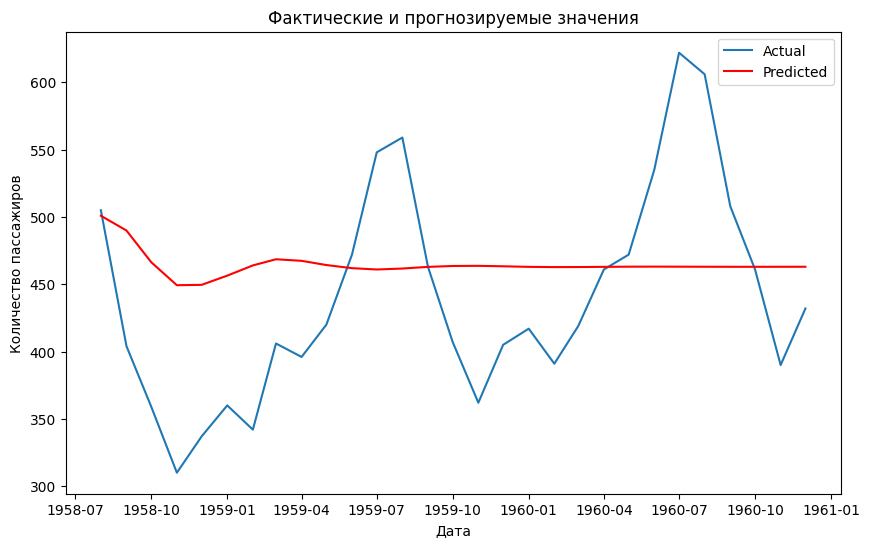

In [34]:
# Постройте график сравнения фактических и прогнозируемых значений
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('Фактические и прогнозируемые значения')
plt.xlabel('Дата')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()

In [36]:
# Подбор модели ARIMA
model = ARIMA(train, order=(13, 1, 0))
model_fit = model.fit()

# Сделать прогнозы
predictions = model_fit.forecast(steps=len(test))

from sklearn.metrics import mean_squared_error
from math import sqrt
# Вычислить MSE
mse = mean_squared_error(test, predictions)
print('Среднеквадратичная ошибка:', mse)

# Вычислить RMSE
rmse = sqrt(mse)
print('Root Mean Squared Error:', rmse)

C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Среднеквадратичная ошибка: 2199.5376550397095
Root Mean Squared Error: 46.899228725424784


C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


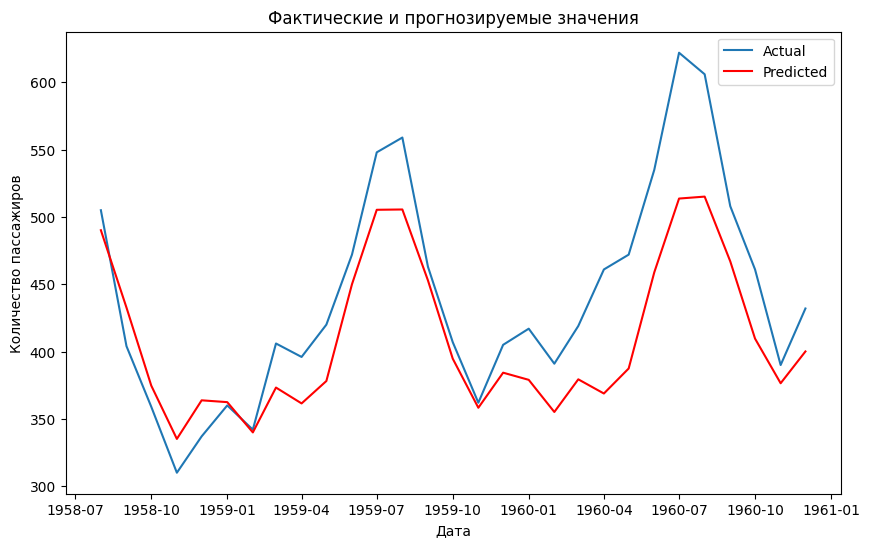

In [37]:
# Постройте график сравнения фактических и прогнозируемых значений
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('Фактические и прогнозируемые значения')
plt.xlabel('Дата')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()

In [ ]:
SARIMA
Это расширение модели ARIMA, которая
явно моделирует сезонный компонент в
одномерных данных временных рядов.

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Определяем модель SARIMA
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
# Подгонка модели
model_fit = model.fit(disp=False)
# Выведите итоговое значение модели
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Fri, 18 Apr 2025   AIC                           1022.299
Time:                                    09:14:32   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.357      0.721      -0.825       0.570
ma.L1         -0.2149      0.325   

In [ ]:
Используя те же данные о продажах машин по месяцам , сделайте прогноз с
использованием модели SARIMA.

C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1969-01-01    13880.391754
1969-02-01    14408.413177
1969-03-01    21711.352518
1969-04-01    22437.739463
1969-05-01    26017.038890
1969-06-01    22599.710444
1969-07-01    17638.999810
1969-08-01    16601.957045
1969-09-01    15158.951631
1969-10-01    20471.244672
1969-11-01    18161.291915
1969-12-01    15654.253755
Freq: MS, Name: predicted_mean, dtype: float64


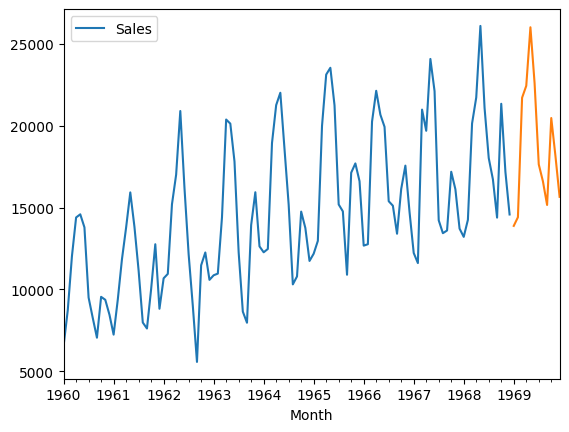

In [39]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
data = pd.read_csv(url, header=0, index_col=0, parse_dates=True)
model = SARIMAX(data, order=(1,1,1), seasonal_order=(1,1,1,12)) # создаем объект Модель - экземпляр класса
model_fit = model.fit() #даем команду модели - Учись!
forecast = model_fit.forecast(steps=12) #делаем предсказание и указываем насколько шагов (12) вперед мы хотим считать прогноз
print(forecast)
data.plot()
forecast.plot()
plt.show()

In [ ]:
Facebook Prophet
Это библиотека с открытым исходным
кодом, предназначенная для
прогнозирования временных рядов данных.

In [41]:
from prophet import Prophet
data.reset_index(inplace=True)
data.columns = ['ds', 'y'] # Prophet требует, чтобы столбцы были названы 'ds' (дата) и 'y' (значение).
# Создаем экземпляр Prophet
model = Prophet()
# Подгонка модели к данным
model.fit(data)

C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
09:21:36 - cmdstanpy - INFO - Chain [1] start processing
09:21:36 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
# Создаем фрейм данных для хранения прогнозов
future = model.make_future_dataframe(periods=12, freq='ME') # Прогнозирование на 12 месяцев вперед
# Делаем прогнозы
forecast = model.predict(future)

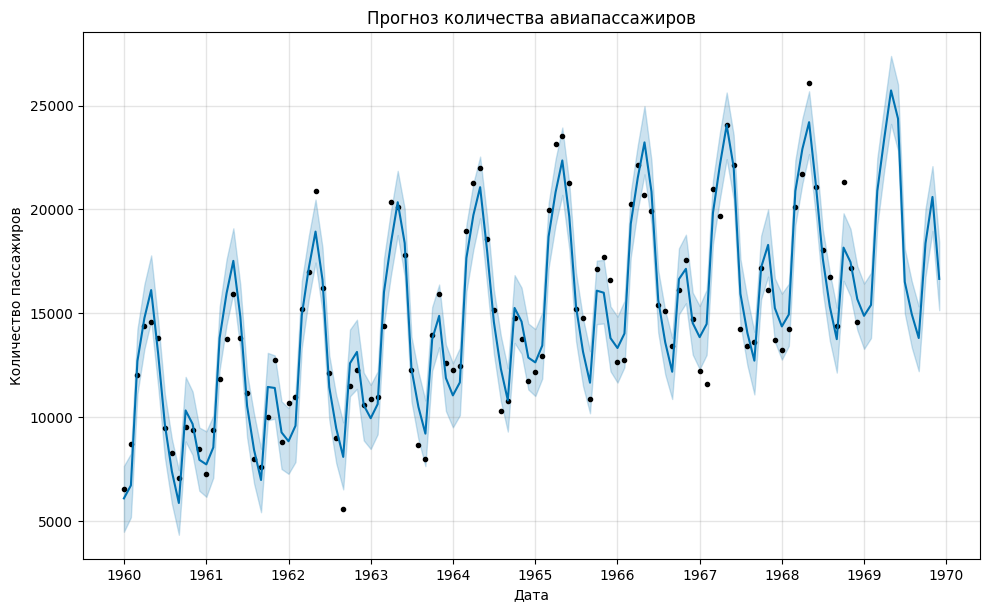

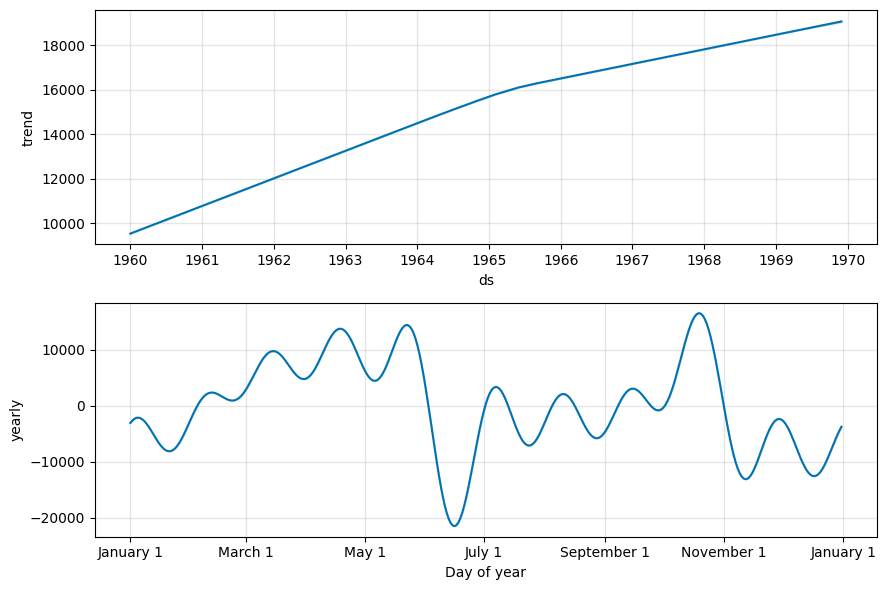

In [45]:
# Построить график прогноза
fig1 = model.plot(forecast)
plt.title('Прогноз количества авиапассажиров')
plt.xlabel('Дата')
plt.ylabel('Количество пассажиров')
plt.show()
# Построить график компонентов прогноза
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
Практическая работа

In [ ]:
Используя данные о продажах машин по месяцам, сделайте прогноз с использованием модели ARIMA.

In [50]:
# Задание 1
# Используя данные о продажах машин по месяцам, сделайте прогноз с использованием модели ARIMA.
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset


data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv', header=0, index_col=0)
data

train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]
train

# Подбор модели ARIMA
model = ARIMA(train, order=(13, 1, 0))
model_fit = model.fit()
model_fit

# Сделать прогнозы
predictions = model_fit.forecast(steps=len(test))
predictions


C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\A

1967-03-01    18168.978167
1967-04-01    20941.874325
1967-05-01    20413.016072
1967-06-01    18216.883181
1967-07-01    15146.771896
1967-08-01    14402.237111
1967-09-01    14043.405046
1967-10-01    15728.628873
1967-11-01    16852.584406
1967-12-01    14846.698710
1968-01-01    12152.164409
1968-02-01    12326.095512
1968-03-01    17189.767115
1968-04-01    20740.604931
1968-05-01    20367.672955
1968-06-01    17762.131607
1968-07-01    15034.648539
1968-08-01    14336.918588
1968-09-01    14598.718921
1968-10-01    15813.434907
1968-11-01    16506.898364
1968-12-01    14839.540140
Freq: MS, Name: predicted_mean, dtype: float64

Среднеквадратичная ошибка: 6736843.99515581
Root Mean Squared Error: 2595.543102157198


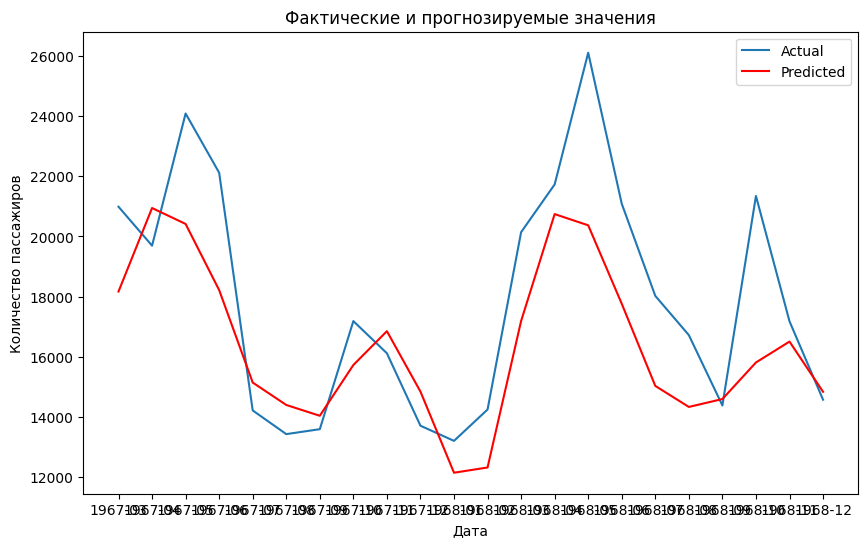

In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Вычислить MSE
mse = mean_squared_error(test, predictions)
print('Среднеквадратичная ошибка:', mse)

# Вычислить RMSE
rmse = sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Постройте график сравнения фактических и прогнозируемых значений
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('Фактические и прогнозируемые значения')
plt.xlabel('Дата')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()

In [ ]:
1. Получить датасет, разбить его на две части: обучение + тест
2. Выбрать модель и ее параметры
3. Рассчитать модель (обучить модель) + оценить качество
4. Сделать предсказание
5. Сравнить предсказание с тестом + оценить качество

In [ ]:
Используя те же данные о продажах машин по месяцам , сделайте прогноз с использованием модели SARIMA.

,Sales
Month,
1960-01,6550
1960-02,8728
1960-03,12026
1960-04,14395
1960-05,14587
...,...
1968-08,16722
1968-09,14385
1968-10,21342


C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1969-01-01    13880.391754
1969-02-01    14408.413177
1969-03-01    21711.352518
1969-04-01    22437.739463
1969-05-01    26017.038890
1969-06-01    22599.710444
1969-07-01    17638.999810
1969-08-01    16601.957045
1969-09-01    15158.951631
1969-10-01    20471.244672
1969-11-01    18161.291915
1969-12-01    15654.253755
Freq: MS, Name: predicted_mean, dtype: float64
<class 'pandas.core.series.Series'>


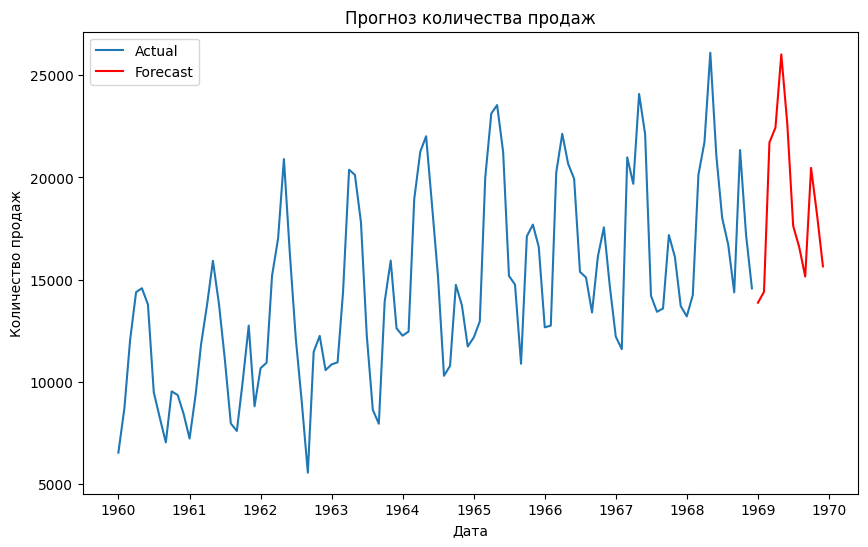

In [56]:
# Задание 2
# Используя те же данные о продажах машин по месяцам , сделайте прогноз с использованием модели SARIMA.

#1
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv', header=0, index_col=0)
display(data)

#2
model = SARIMAX(data, order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))

#3
model_fit = model.fit()
# print(model_fit.summary())

#4
forecast = model_fit.forecast(steps = 12)
print(forecast)
print(type(forecast))

# Постройте график результатов
data.index = pd.to_datetime(data.index)

plt.figure(figsize=(10, 6))
plt.plot(data['Sales'], label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Прогноз количества продаж')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.legend()
plt.show()

In [ ]:
type(data.index)
pandas.core.indexes.base.Index
type(forecast.index)
pandas.core.indexes.datetimes.DatetimeIndex